# RAINFALL PREDICTION USING ML

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', '10 years Gannavaram data.csv', 'catboost_info', 'WEATHER(RH%).ipynb', 'WEATHER(TEMP).ipynb', 'Weather.ipynb']


### LOAD DATASET

In [2]:
df = pd.read_csv("10 years Gannavaram data.csv")
df

,Date,Place,Max Temp,Min Temp,RH%(830),RH%(1730),Rainfall(mm)
0,Nov-1-2013,GNV,31.9,23.8,92,72.0,0.0
1,Nov-2-2013,GNV,32.6,23.8,74,85.0,0.0
2,Nov-3-2013,GNV,32.5,24.0,86,80.0,0.0
3,Nov-4-2013,GNV,32.4,23.2,83,74.0,0.0
4,Nov-5-2013,GNV,31.6,21.0,75,60.0,0.0
...,...,...,...,...,...,...,...
3312,Nov-26-2022,GNV,31.3,23.4,90,80.0,7.2
3313,Nov-27-2022,GNV,31.2,21.4,87,73.0,0.0
3314,Nov-28-2022,GNV,31.0,19.5,87,63.0,0.0
3315,Nov-29-2022,GNV,30.6,19.4,81,62.0,0.0


### Verifying it as a 'dataframe' object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

### Shape of dataset

In [4]:
df.shape

(3317, 7)

### Printing out a few columns

In [5]:
df.head()

,Date,Place,Max Temp,Min Temp,RH%(830),RH%(1730),Rainfall(mm)
0,Nov-1-2013,GNV,31.9,23.8,92,72.0,0.0
1,Nov-2-2013,GNV,32.6,23.8,74,85.0,0.0
2,Nov-3-2013,GNV,32.5,24.0,86,80.0,0.0
3,Nov-4-2013,GNV,32.4,23.2,83,74.0,0.0
4,Nov-5-2013,GNV,31.6,21.0,75,60.0,0.0


In [6]:
df.tail()

,Date,Place,Max Temp,Min Temp,RH%(830),RH%(1730),Rainfall(mm)
3312,Nov-26-2022,GNV,31.3,23.4,90,80.0,7.2
3313,Nov-27-2022,GNV,31.2,21.4,87,73.0,0.0
3314,Nov-28-2022,GNV,31.0,19.5,87,63.0,0.0
3315,Nov-29-2022,GNV,30.6,19.4,81,62.0,0.0
3316,Nov-30-2022,GNV,29.4,18.8,84,62.0,0.0


In [7]:
df.describe()

,Max Temp,Min Temp,RH%(830),RH%(1730),Rainfall(mm)
count,3316.000000,3315.000000,3317.000000,3255.000000,3317.000000
mean,34.076719,23.997345,78.367802,60.451613,3.076364
std,3.799745,3.218548,10.691096,15.619694,11.233605
min,0.000000,13.600000,24.000000,8.000000,0.000000
25%,31.200000,21.550000,72.000000,50.000000,0.000000
50%,33.700000,24.600000,79.000000,59.000000,0.000000
75%,36.500000,26.200000,86.000000,71.000000,0.000000
max,47.300000,33.000000,128.000000,100.000000,162.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3317 non-null   object 
 1   Place         3317 non-null   object 
 2   Max Temp      3316 non-null   float64
 3   Min Temp      3315 non-null   float64
 4   RH%(830)      3317 non-null   int64  
 5   RH%(1730)     3255 non-null   float64
 6   Rainfall(mm)  3317 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 181.5+ KB


### Check for missing values

In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date             0
Place            0
Max Temp         1
Min Temp         2
RH%(830)         0
RH%(1730)       62
Rainfall(mm)     0
dtype: int64


### Using fillna Method to fill Missing Values

In [10]:
# Filling numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Alternatively, filling with median
# df.fillna(df.median(), inplace=True)

# For categorical columns, filling with mode
# df['CategoryColumn'].fillna(df['CategoryColumn'].mode()[0], inplace=True)

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Date            0
Place           0
Max Temp        0
Min Temp        0
RH%(830)        0
RH%(1730)       0
Rainfall(mm)    0
dtype: int64


### Checking correlation between columns

In [11]:
print(df.columns)

Index(['Date', 'Place', 'Max Temp', 'Min Temp', 'RH%(830)', 'RH%(1730)',
       'Rainfall(mm)'],
      dtype='object')


In [12]:
df["Rainfall(mm)"].describe()

count    3317.000000
mean        3.076364
std        11.233605
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       162.800000
Name: Rainfall(mm), dtype: float64

In [13]:
df["Rainfall(mm)"].unique()

array([0.000e+00, 1.002e+02, 8.000e-01, 1.200e+00, 2.000e+00, 7.500e+00,
       2.210e+01, 5.500e+00, 4.400e+00, 8.740e+01, 3.600e+00, 4.000e-01,
       3.100e+00, 5.000e-01, 8.000e+00, 4.000e+00, 9.200e+00, 3.960e+01,
       2.270e+01, 7.000e-01, 1.800e+00, 5.000e+00, 1.520e+01, 2.600e+00,
       2.400e+00, 3.400e+00, 1.900e+01, 4.160e+01, 2.700e+01, 1.100e+00,
       2.000e-01, 1.080e+01, 1.220e+01, 3.800e+01, 7.300e+00, 2.200e+00,
       7.200e+00, 7.640e+01, 2.800e+00, 5.600e+00, 1.900e+00, 7.000e+00,
       4.100e+00, 2.900e+00, 7.100e+00, 7.600e+00, 1.240e+01, 6.800e+00,
       3.700e+00, 1.430e+01, 1.440e+01, 3.200e+00, 3.000e-01, 4.000e+01,
       5.580e+01, 6.000e-01, 1.570e+01, 4.800e+00, 1.000e+00, 1.940e+01,
       3.980e+01, 5.700e+00, 1.700e+01, 6.480e+01, 2.820e+01, 1.000e+01,
       2.300e+00, 1.740e+01, 1.400e+00, 1.820e+01, 8.600e+00, 4.090e+01,
       9.400e+00, 2.070e+01, 9.300e+00, 2.570e+01, 1.060e+01, 6.400e+00,
       3.480e+01, 1.600e+00, 1.980e+01, 5.400e+00, 

In [14]:
print(df.corr()["Rainfall(mm)"].abs().sort_values(ascending=False))

Rainfall(mm)    1.000000
RH%(1730)       0.299442
RH%(830)        0.264015
Max Temp        0.117749
Min Temp        0.021251
Name: Rainfall(mm), dtype: float64


### EXPLORATORY DATA ANALYSIS (EDA)

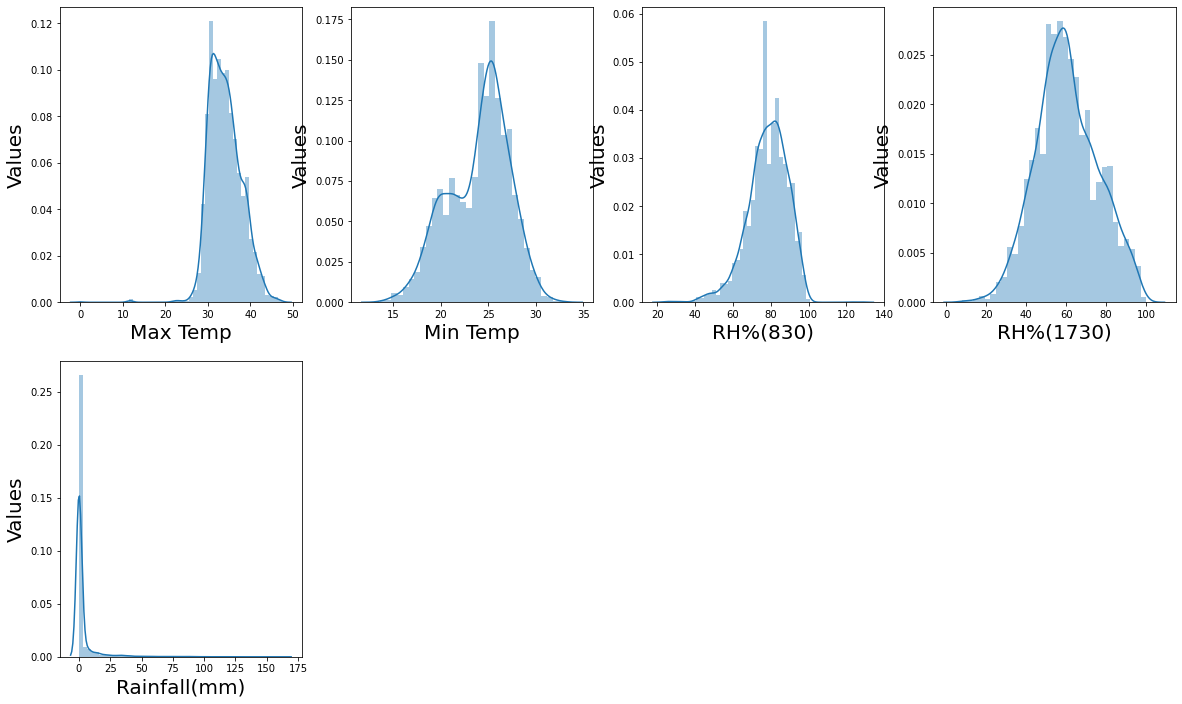

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Drop non-numeric columns or handle them accordingly
df_numeric = df.drop(columns=non_numeric_columns)

# Plotting the distribution plots for numeric columns
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_numeric:
    if plotnumber <= len(df_numeric.columns):
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df_numeric[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Values', fontsize=20)
    plotnumber += 1

plt.show()

Without Rainfall    2529
With Rainfall        788
Name: RainfallBinary, dtype: int64


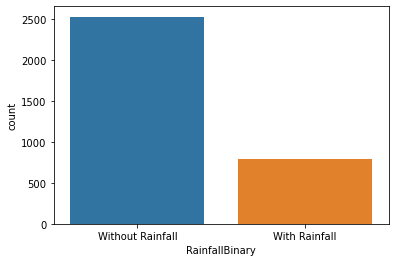

In [16]:
# Create a binary column to represent days with and without rainfall
df['RainfallBinary'] = df['Rainfall(mm)'].apply(lambda x: 'With Rainfall' if x > 0 else 'Without Rainfall')

# Plot the count of days with and without rainfall
sns.countplot(x=df['RainfallBinary'])

# Calculate the count of days with and without rainfall
rainfall_distribution = df['RainfallBinary'].value_counts()

# Print the distribution
print(rainfall_distribution)

In [17]:
# Total number of days in the dataset
total_days = len(df)

# Number of days with rainfall
days_with_rainfall = len(df[df['Rainfall(mm)'] > 0])

# Number of days without rainfall
days_without_rainfall = len(df[df['Rainfall(mm)'] == 0])

# Calculate percentages
percentage_with_rainfall = (days_with_rainfall * 100) / total_days
percentage_without_rainfall = (days_without_rainfall * 100) / total_days

# Print the results
print("Percentage of days without rainfall: " + str(round(percentage_without_rainfall, 2)))
print("Percentage of days with rainfall: " + str(round(percentage_with_rainfall, 2)))

Percentage of days without rainfall: 76.24
Percentage of days with rainfall: 23.76


Correlation matrix:
               Max Temp  Min Temp  RH%(830)  RH%(1730)  Rainfall(mm)
Max Temp      1.000000  0.656648 -0.457294  -0.522202     -0.117749
Min Temp      0.656648  1.000000 -0.342714  -0.006398      0.021251
RH%(830)     -0.457294 -0.342714  1.000000   0.431601      0.264015
RH%(1730)    -0.522202 -0.006398  0.431601   1.000000      0.299442
Rainfall(mm) -0.117749  0.021251  0.264015   0.299442      1.000000


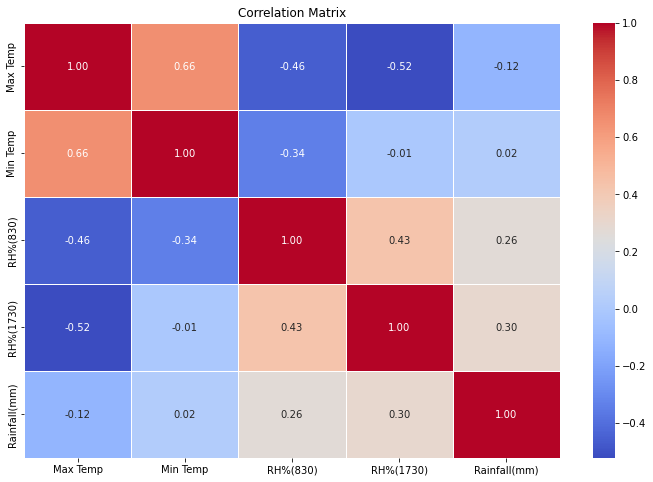

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

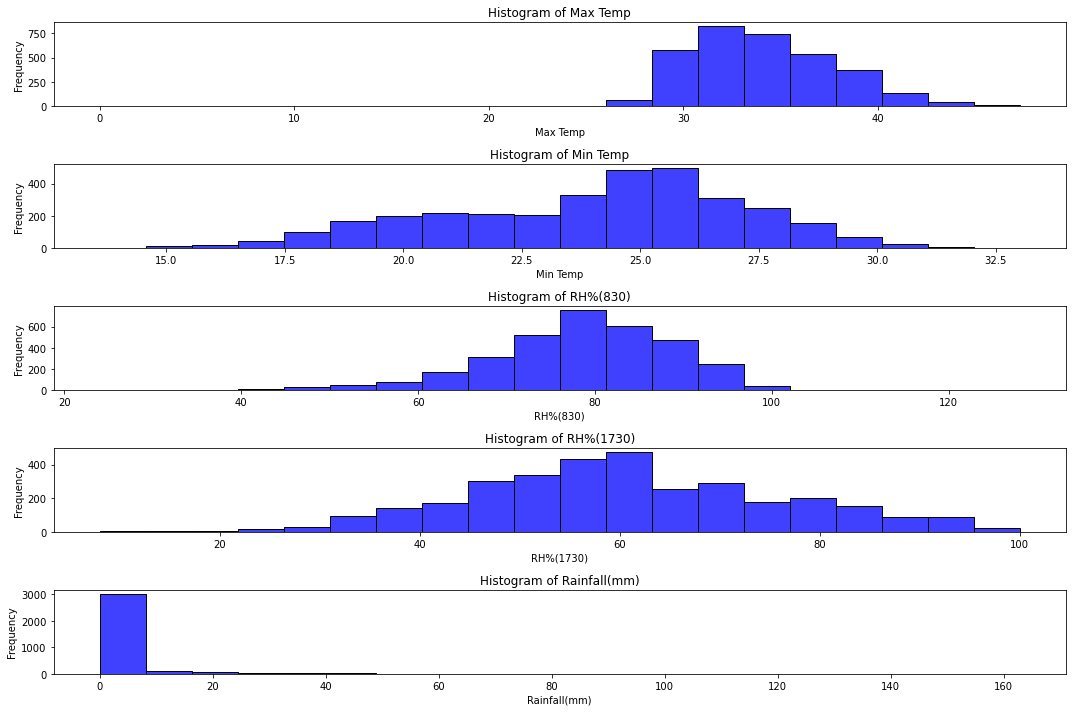

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot histograms for each numerical column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['float64', 'int64']).columns), 1, i)
    sns.histplot(df[column], kde=False, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Train Test split

In [20]:
from sklearn.model_selection import train_test_split

predictors = df.drop("Rainfall(mm)",axis=1)
target = df["Rainfall(mm)"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
X_train.shape

(2653, 7)

In [22]:
X_test.shape

(664, 7)

In [23]:
Y_train.shape

(2653,)

In [24]:
Y_test.shape

(664,)

### Model Fitting

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### DECISION TREE(DT)

## 2 Labels

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Example: Convert continuous target to two categorical bins (Low and High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 15, np.inf], labels=['Low', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9367469879518072
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       624
           1       0.48      0.57      0.52        40

    accuracy                           0.94       664
   macro avg       0.73      0.77      0.74       664
weighted avg       0.94      0.94      0.94       664

Confusion Matrix:
 [[599  25]
 [ 17  23]]


## 3 Labels

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Example: Convert continuous target to three categorical bins (Low, Moderate, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, np.inf], labels=['Low', 'Moderate', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9051204819277109
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       610
           1       0.11      0.18      0.14        17
           2       0.47      0.46      0.47        37

    accuracy                           0.91       664
   macro avg       0.52      0.53      0.52       664
weighted avg       0.92      0.91      0.91       664

Confusion Matrix:
 [[581  15  14]
 [  9   3   5]
 [ 11   9  17]]


## 4 Labels

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Example: Convert continuous target to categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, 30, np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8930722891566265
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       610
           1       0.11      0.12      0.11        17
           2       0.00      0.00      0.00         8
           3       0.33      0.24      0.28        29

    accuracy                           0.89       664
   macro avg       0.35      0.33      0.34       664
weighted avg       0.90      0.89      0.90       664

Confusion Matrix:
 [[584  11   7   8]
 [ 11   2   2   2]
 [  3   1   0   4]
 [ 11   4   7   7]]


## 5 Labels

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Example: Convert continuous target to five categorical bins (Very Low, Low, Moderate, High, Very High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 5, 10, 20, 30, np.inf], 
                                labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8569277108433735
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       580
           1       0.22      0.20      0.21        30
           2       0.11      0.18      0.13        17
           3       0.10      0.12      0.11         8
           4       0.32      0.21      0.25        29

    accuracy                           0.86       664
   macro avg       0.34      0.33      0.33       664
weighted avg       0.86      0.86      0.86       664

Confusion Matrix:
 [[553  12  10   1   4]
 [ 15   6   7   1   1]
 [  5   2   3   3   4]
 [  1   1   1   1   4]
 [  6   6   7   4   6]]


### LOGISTIC REGRESSION(LR)

In [30]:
from sklearn. linear_model import LogisticRegression
logreg = LogisticRegression()
logreg. fit(X_train, Y_train)

LogisticRegression()

## 2 Labels

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 2 categorical bins (Low, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 20, np.inf], labels=['Low', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.9581605729362985
Test Accuracy: 0.9487951807228916
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       627
           1       1.00      0.08      0.15        37

    accuracy                           0.95       664
   macro avg       0.97      0.54      0.56       664
weighted avg       0.95      0.95      0.93       664

Confusion Matrix:
 [[627   0]
 [ 34   3]]


## 3 Labels

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 3 categorical bins (Low, Moderate, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, np.inf], labels=['Low', 'Moderate', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.9246136449302677
Test Accuracy: 0.9231927710843374
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       610
           1       0.00      0.00      0.00        17
           2       0.58      0.19      0.29        37

    accuracy                           0.92       664
   macro avg       0.50      0.39      0.42       664
weighted avg       0.89      0.92      0.90       664

Confusion Matrix:
 [[606   0   4]
 [ 16   0   1]
 [ 30   0   7]]


## 4 Labels

In [33]:
# Convert continuous target to categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, 30, np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Logistic Regression model (used for classification)
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.9212212589521297
Test Accuracy: 0.9216867469879518
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       610
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         8
           3       0.60      0.10      0.18        29

    accuracy                           0.92       664
   macro avg       0.38      0.28      0.28       664
weighted avg       0.88      0.92      0.89       664

Confusion Matrix:
 [[609   0   0   1]
 [ 17   0   0   0]
 [  7   0   0   1]
 [ 26   0   0   3]]


## 5 Labels

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 5 categorical bins (Very Low, Low, Moderate, High, Very High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 5, 10, 20, 30, np.inf], 
                                labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.8857896720693554
Test Accuracy: 0.8719879518072289
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       580
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         8
           4       1.00      0.03      0.07        29

    accuracy                           0.87       664
   macro avg       0.37      0.21      0.20       664
weighted avg       0.81      0.87      0.82       664

Confusion Matrix:
 [[578   2   0   0   0]
 [ 30   0   0   0   0]
 [ 17   0   0   0   0]
 [  8   0   0   0   0]
 [ 28   0   0   0   1]]


### RANDOM FOREST(RF)

In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## 2 Labels

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 2 categorical bins (Low, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 20, np.inf], 
                                labels=['Low', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9548192771084337
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       627
           1       0.73      0.30      0.42        37

    accuracy                           0.95       664
   macro avg       0.85      0.65      0.70       664
weighted avg       0.95      0.95      0.95       664

Confusion Matrix:
 [[623   4]
 [ 26  11]]


## 3 Labels

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 3 categorical bins (Low, Moderate, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 10, 20, np.inf], 
                                labels=['Low', 'Moderate', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9322289156626506
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       610
           1       0.14      0.06      0.08        17
           2       0.71      0.41      0.52        37

    accuracy                           0.93       664
   macro avg       0.60      0.48      0.52       664
weighted avg       0.91      0.93      0.92       664

Confusion Matrix:
 [[603   2   5]
 [ 15   1   1]
 [ 18   4  15]]


## 4 Labels

In [38]:
# Convert continuous target to categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, 30, np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9171686746987951
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       610
           1       0.10      0.06      0.07        17
           2       0.00      0.00      0.00         8
           3       0.36      0.14      0.20        29

    accuracy                           0.92       664
   macro avg       0.35      0.30      0.31       664
weighted avg       0.88      0.92      0.90       664

Confusion Matrix:
 [[604   2   0   4]
 [ 15   1   0   1]
 [  3   3   0   2]
 [ 20   4   1   4]]


## 5 Labels

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 5 categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 5, 10, 15, 20, np.inf], 
                                labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8870481927710844
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       580
           1       0.25      0.07      0.11        30
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           4       0.57      0.46      0.51        37

    accuracy                           0.89       664
   macro avg       0.35      0.30      0.31       664
weighted avg       0.85      0.89      0.86       664

Confusion Matrix:
 [[570   0   2   0   8]
 [ 24   2   0   1   3]
 [ 10   1   0   1   2]
 [  2   1   0   0   0]
 [ 12   4   3   1  17]]


### XG BOOST(EXTREME GRADIENT BOOSTING)

In [40]:
!pip install xgboost

In [41]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(verbosity=0)
xgbc.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 2 Labels

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 2 categorical bins (Low and High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 15, np.inf], 
                                labels=['Low', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9397590361445783
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       624
           1       0.50      0.38      0.43        40

    accuracy                           0.94       664
   macro avg       0.73      0.68      0.70       664
weighted avg       0.93      0.94      0.94       664

Confusion Matrix:
 [[609  15]
 [ 25  15]]


## 3 Labels

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 3 categorical bins (Low, Medium, High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 10, 30, np.inf], 
                                labels=['Low', 'Medium', 'High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred, target_names=['Low', 'Medium', 'High']))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9096385542168675
Classification Report:
               precision    recall  f1-score   support

         Low       0.95      0.97      0.96       610
      Medium       0.21      0.24      0.22        25
        High       0.42      0.17      0.24        29

    accuracy                           0.91       664
   macro avg       0.53      0.46      0.48       664
weighted avg       0.90      0.91      0.90       664

Confusion Matrix:
 [[593  12   5]
 [ 17   6   2]
 [ 13  11   5]]


## 4 Labels

In [44]:
import xgboost as xgb

# Convert continuous target to categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], bins=[-np.inf, 10, 20, 30, np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9081325301204819
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       610
           1       0.17      0.18      0.17        17
           2       0.14      0.12      0.13         8
           3       0.38      0.17      0.24        29

    accuracy                           0.91       664
   macro avg       0.41      0.36      0.38       664
weighted avg       0.89      0.91      0.90       664

Confusion Matrix:
 [[594   8   1   7]
 [ 13   3   1   0]
 [  4   2   1   1]
 [ 15   5   4   5]]


## 5 Labels

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert continuous target to 5 categorical bins (Very Low, Low, Medium, High, Very High)
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 5, 10, 20, 30, np.inf], 
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Prepare data for classification
predictors = df.drop(["Rainfall(mm)", "RainfallCategory"], axis=1)
target = df["RainfallCategory"]

# Manually encode categorical features
for column in predictors.select_dtypes(include=['object']).columns:
    predictors[column] = predictors[column].astype('category').cat.codes

# Convert target variable to numeric categories
target = target.astype('category').cat.codes

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Create and train the XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_test_pred, target_names=['Very Low', 'Low', 'Medium', 'High', 'Very High']))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8689759036144579
Classification Report:
               precision    recall  f1-score   support

    Very Low       0.94      0.97      0.95       580
         Low       0.20      0.17      0.18        30
      Medium       0.28      0.29      0.29        17
        High       0.09      0.12      0.11         8
   Very High       0.38      0.17      0.24        29

    accuracy                           0.87       664
   macro avg       0.38      0.35      0.35       664
weighted avg       0.85      0.87      0.86       664

Confusion Matrix:
 [[561   8   4   2   5]
 [ 20   5   4   0   1]
 [  6   5   5   1   0]
 [  2   2   1   1   2]
 [  8   5   4   7   5]]


### CATBOOST

In [46]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


## 2 Labels

In [47]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Convert 'Rainfall(mm)' to binary classification: 0 = No Rain, 1 = Rain
df['RainfallCategory'] = (df['Rainfall(mm)'] > 0).astype(int)

# Define the features
X = df[['Date', 'Place', 'Max Temp', 'Min Temp', 'RH%(830)', 'RH%(1730)']]

# Handle categorical data
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

# Define categorical features
categorical_features = ['Place']

# Define the target
y = df['RainfallCategory']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier for binary classification
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_features, verbose=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Additional metrics for evaluation
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Rain', 'Rain']))

0:	learn: 0.5814863	total: 146ms	remaining: 2m 25s
100:	learn: 0.1539007	total: 657ms	remaining: 5.85s
200:	learn: 0.1019266	total: 1.38s	remaining: 5.47s
300:	learn: 0.0712506	total: 2.34s	remaining: 5.44s
400:	learn: 0.0507563	total: 2.59s	remaining: 3.87s
500:	learn: 0.0367604	total: 2.84s	remaining: 2.83s
600:	learn: 0.0281700	total: 3.63s	remaining: 2.41s
700:	learn: 0.0222226	total: 4.3s	remaining: 1.83s
800:	learn: 0.0190815	total: 4.56s	remaining: 1.13s
900:	learn: 0.0164797	total: 4.82s	remaining: 530ms
999:	learn: 0.0139130	total: 5.08s	remaining: 0us
Train Accuracy: 1.0000
Test Accuracy: 0.9036
Classification Report:
              precision    recall  f1-score   support

     No Rain       0.93      0.94      0.94       511
        Rain       0.80      0.77      0.79       153

    accuracy                           0.90       664
   macro avg       0.87      0.86      0.86       664
weighted avg       0.90      0.90      0.90       664



## 3 Labels

In [48]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Convert 'Rainfall(mm)' to 3 categorical bins: Low, Medium, High
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 10, 20, np.inf], 
                                labels=['Low', 'Medium', 'High'])

# Define the features
X = df[['Date', 'Place', 'Max Temp', 'Min Temp', 'RH%(830)', 'RH%(1730)']]

# Handle categorical data
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

# Define categorical features
categorical_features = ['Place']

# Define the target
y = df['RainfallCategory']

# Encode target variable to numeric categories
y = y.astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier for multi-class classification
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_features, verbose=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Additional metrics for evaluation
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High']))

0:	learn: 0.9526336	total: 4.08ms	remaining: 4.08s
100:	learn: 0.1479857	total: 303ms	remaining: 2.7s
200:	learn: 0.1065532	total: 591ms	remaining: 2.35s
300:	learn: 0.0805225	total: 848ms	remaining: 1.97s
400:	learn: 0.0620814	total: 1.09s	remaining: 1.64s
500:	learn: 0.0484999	total: 1.37s	remaining: 1.36s
600:	learn: 0.0395760	total: 1.63s	remaining: 1.08s
700:	learn: 0.0325153	total: 1.88s	remaining: 803ms
800:	learn: 0.0272853	total: 2.13s	remaining: 530ms
900:	learn: 0.0234912	total: 2.39s	remaining: 262ms
999:	learn: 0.0205304	total: 2.64s	remaining: 0us
Train Accuracy: 1.0000
Test Accuracy: 0.9262
Classification Report:
              precision    recall  f1-score   support

         Low       0.96      0.98      0.97       618
      Medium       0.22      0.11      0.14        19
        High       0.36      0.33      0.35        27

    accuracy                           0.93       664
   macro avg       0.51      0.47      0.49       664
weighted avg       0.91      0.93     

## 4 Labels

In [49]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Convert 'Rainfall(mm)' to 4 categorical bins: Very Low, Low, Medium, High
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 5, 10, 20, np.inf], 
                                labels=['Very Low', 'Low', 'Medium', 'High'])

# Define the features
X = df[['Date', 'Place', 'Max Temp', 'Min Temp', 'RH%(830)', 'RH%(1730)']]

# Handle categorical data
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

# Define categorical features
categorical_features = ['Place']

# Define the target
y = df['RainfallCategory']

# Encode target variable to numeric categories
y = y.astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier for multi-class classification
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_features, verbose=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Additional metrics for evaluation
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Very Low', 'Low', 'Medium', 'High']))

0:	learn: 1.1822962	total: 5.73ms	remaining: 5.72s
100:	learn: 0.2247287	total: 404ms	remaining: 3.59s
200:	learn: 0.1599020	total: 775ms	remaining: 3.08s
300:	learn: 0.1204627	total: 1.12s	remaining: 2.59s
400:	learn: 0.0917864	total: 1.44s	remaining: 2.15s
500:	learn: 0.0730876	total: 1.76s	remaining: 1.76s
600:	learn: 0.0595079	total: 2.1s	remaining: 1.39s
700:	learn: 0.0485125	total: 2.45s	remaining: 1.04s
800:	learn: 0.0406803	total: 2.78s	remaining: 691ms
900:	learn: 0.0350051	total: 3.11s	remaining: 342ms
999:	learn: 0.0306143	total: 3.42s	remaining: 0us
Train Accuracy: 1.0000
Test Accuracy: 0.8976
Classification Report:
              precision    recall  f1-score   support

    Very Low       0.94      0.98      0.96       594
         Low       0.00      0.00      0.00        24
      Medium       0.22      0.11      0.14        19
        High       0.38      0.41      0.39        27

    accuracy                           0.90       664
   macro avg       0.39      0.37     

## 5 Labels 

In [50]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Convert 'Rainfall(mm)' to 5 categorical bins
df['RainfallCategory'] = pd.cut(df['Rainfall(mm)'], 
                                bins=[-np.inf, 5, 10, 20, 30, np.inf], 
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Define the features
X = df[['Date', 'Place', 'Max Temp', 'Min Temp', 'RH%(830)', 'RH%(1730)']]

# Handle categorical data
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

# Define categorical features
categorical_features = ['Place']

# Define the target
y = df['RainfallCategory']

# Encode target variable to numeric categories
y = y.astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier for multi-class classification
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_features, verbose=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Additional metrics for evaluation
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Very Low', 'Low', 'Medium', 'High', 'Very High']))

0:	learn: 1.3382127	total: 4.83ms	remaining: 4.83s
100:	learn: 0.2455977	total: 418ms	remaining: 3.72s
200:	learn: 0.1718289	total: 827ms	remaining: 3.29s
300:	learn: 0.1285704	total: 1.2s	remaining: 2.78s
400:	learn: 0.0986877	total: 1.6s	remaining: 2.39s
500:	learn: 0.0784242	total: 2s	remaining: 1.99s
600:	learn: 0.0635290	total: 2.39s	remaining: 1.59s
700:	learn: 0.0522833	total: 2.82s	remaining: 1.2s
800:	learn: 0.0439234	total: 3.29s	remaining: 818ms
900:	learn: 0.0375616	total: 3.75s	remaining: 412ms
999:	learn: 0.0325042	total: 4.27s	remaining: 0us
Train Accuracy: 1.0000
Test Accuracy: 0.8961
Classification Report:
              precision    recall  f1-score   support

    Very Low       0.94      0.98      0.96       594
         Low       0.00      0.00      0.00        24
      Medium       0.31      0.21      0.25        19
        High       0.33      0.08      0.13        12
   Very High       0.25      0.33      0.29        15

    accuracy                           0.90

### GAUSSIAN PROCESS

## 2 Labels

In [51]:
from sklearn.datasets import make_blobs
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data for binary classification
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=0.60, random_state=0)

# Define custom labels
labels = ['Low', 'High']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gpc.predict(X_train)
y_test_pred = gpc.predict(X_test)

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 1.0000
Test Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       155
        High       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[155   0]
 [  0 145]]


## 3 Labels

In [52]:
from sklearn.datasets import make_blobs
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate sample data for three-class classification
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

# Define custom labels
labels = ['Low', 'Medium', 'High']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gpc.predict(X_train)
y_test_pred = gpc.predict(X_test)

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9986
Test Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        98
      Medium       1.00      1.00      1.00        92
        High       1.00      1.00      1.00       110

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[ 98   0   0]
 [  0  92   0]
 [  0   0 110]]


## 4 Labels

In [53]:
from sklearn.datasets import make_blobs
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate sample data for four-class classification
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Define custom labels
labels = ['Very Low', 'Low', 'Medium', 'High']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gpc.predict(X_train)
y_test_pred = gpc.predict(X_test)

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9971
Test Accuracy: 0.9967
Classification Report:
               precision    recall  f1-score   support

    Very Low       0.99      1.00      0.99        68
         Low       1.00      1.00      1.00        81
      Medium       1.00      0.99      0.99        72
        High       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[68  0  0  0]
 [ 0 81  0  0]
 [ 1  0 71  0]
 [ 0  0  0 79]]


## 5 Labels

In [54]:
from sklearn.datasets import make_blobs
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate sample data for five-class classification
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

# Define custom labels
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gpc.predict(X_train)
y_test_pred = gpc.predict(X_test)

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9957
Test Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

    Very Low       1.00      1.00      1.00        55
         Low       1.00      1.00      1.00        67
      Medium       1.00      1.00      1.00        62
        High       1.00      1.00      1.00        54
   Very High       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[55  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  0 62  0  0]
 [ 0  0  0 54  0]
 [ 0  0  0  0 62]]


## HYBRID ALGORITHMS

### CATBOOST WITH LOGISTICREGRESSION

## 2 labels

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate sample data for binary classification
X, y = make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=1, random_state=0)

# Define features (not used here but typically included)
# Handle categorical features (if any) as you did in your real dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('catboost', catboost_model)],
    final_estimator=logistic_model,
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report for 2 labels
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'High']))

0:	learn: 0.5673911	total: 6.69ms	remaining: 6.69s
100:	learn: 0.0490950	total: 389ms	remaining: 3.46s
200:	learn: 0.0189489	total: 730ms	remaining: 2.9s
300:	learn: 0.0105539	total: 1.07s	remaining: 2.49s
400:	learn: 0.0071852	total: 1.42s	remaining: 2.12s
500:	learn: 0.0060151	total: 1.76s	remaining: 1.76s
600:	learn: 0.0052855	total: 2.16s	remaining: 1.43s
700:	learn: 0.0046886	total: 2.63s	remaining: 1.12s
800:	learn: 0.0043345	total: 3.25s	remaining: 808ms
900:	learn: 0.0041133	total: 3.75s	remaining: 412ms
999:	learn: 0.0039129	total: 4.3s	remaining: 0us
0:	learn: 0.5610621	total: 5.27ms	remaining: 5.26s
100:	learn: 0.0359819	total: 408ms	remaining: 3.63s
200:	learn: 0.0130060	total: 955ms	remaining: 3.8s
300:	learn: 0.0070988	total: 1.59s	remaining: 3.69s
400:	learn: 0.0048895	total: 1.97s	remaining: 2.94s
500:	learn: 0.0040199	total: 2.3s	remaining: 2.29s
600:	learn: 0.0035164	total: 2.64s	remaining: 1.75s
700:	learn: 0.0032906	total: 2.98s	remaining: 1.27s
800:	learn: 0.002975

## 3 Labels

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate sample data for three-class classification
X, y = make_classification(n_samples=1000, n_classes=3, n_clusters_per_class=1, random_state=0)

# Define features (not used here but typically included)
# Handle categorical features (if any) as you did in your real dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('catboost', catboost_model)],
    final_estimator=logistic_model,
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report for 3 labels
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Very Low', 'Low', 'Medium']))

0:	learn: 0.9912338	total: 12.3ms	remaining: 12.3s
100:	learn: 0.2150352	total: 746ms	remaining: 6.64s
200:	learn: 0.1429741	total: 1.51s	remaining: 6.01s
300:	learn: 0.0939537	total: 2.31s	remaining: 5.36s
400:	learn: 0.0689916	total: 3.13s	remaining: 4.68s
500:	learn: 0.0521599	total: 3.91s	remaining: 3.89s
600:	learn: 0.0403528	total: 4.71s	remaining: 3.13s
700:	learn: 0.0320460	total: 5.46s	remaining: 2.33s
800:	learn: 0.0266709	total: 6.26s	remaining: 1.56s
900:	learn: 0.0225332	total: 7.08s	remaining: 778ms
999:	learn: 0.0194981	total: 7.85s	remaining: 0us
0:	learn: 0.9975361	total: 13.5ms	remaining: 13.5s
100:	learn: 0.2032585	total: 746ms	remaining: 6.64s
200:	learn: 0.1245890	total: 1.46s	remaining: 5.82s
300:	learn: 0.0821044	total: 2.21s	remaining: 5.14s
400:	learn: 0.0586814	total: 2.95s	remaining: 4.41s
500:	learn: 0.0442227	total: 3.72s	remaining: 3.7s
600:	learn: 0.0334310	total: 4.58s	remaining: 3.04s
700:	learn: 0.0276074	total: 5.34s	remaining: 2.28s
800:	learn: 0.022

## 4 Labels

In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate sample data for four-class classification
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=0)

# Define features (not used here but typically included)
# Handle categorical features (if any) as you did in your real dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('catboost', catboost_model)],
    final_estimator=logistic_model,
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report for 4 labels
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Very Low', 'Low', 'Medium', 'High']))

0:	learn: 1.2481563	total: 17.1ms	remaining: 17s
100:	learn: 0.1944515	total: 990ms	remaining: 8.81s
200:	learn: 0.1202320	total: 1.92s	remaining: 7.64s
300:	learn: 0.0803216	total: 2.86s	remaining: 6.64s
400:	learn: 0.0571797	total: 3.89s	remaining: 5.81s
500:	learn: 0.0428318	total: 4.84s	remaining: 4.82s
600:	learn: 0.0332432	total: 5.85s	remaining: 3.88s
700:	learn: 0.0267031	total: 6.78s	remaining: 2.89s
800:	learn: 0.0221648	total: 7.78s	remaining: 1.93s
900:	learn: 0.0187825	total: 8.77s	remaining: 964ms
999:	learn: 0.0160905	total: 9.71s	remaining: 0us
0:	learn: 1.2613106	total: 14.2ms	remaining: 14.2s
100:	learn: 0.1823236	total: 929ms	remaining: 8.27s
200:	learn: 0.1113927	total: 1.87s	remaining: 7.43s
300:	learn: 0.0742367	total: 2.85s	remaining: 6.62s
400:	learn: 0.0517335	total: 3.8s	remaining: 5.68s
500:	learn: 0.0381231	total: 4.81s	remaining: 4.79s
600:	learn: 0.0300170	total: 5.76s	remaining: 3.83s
700:	learn: 0.0245775	total: 6.91s	remaining: 2.95s
800:	learn: 0.02039

## 5 Labels

In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate sample data for five-class classification with adjusted n_informative
X, y = make_classification(n_samples=1000, n_classes=5, n_clusters_per_class=1, n_informative=10, random_state=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the stacking classifier
stacked_model = StackingClassifier(
    estimators=[('catboost', catboost_model)],
    final_estimator=logistic_model,
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report for 5 labels
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Very Low', 'Low', 'Medium', 'High', 'Very High']))

0:	learn: 1.5367046	total: 15.3ms	remaining: 15.3s
100:	learn: 0.2331956	total: 1.21s	remaining: 10.8s
200:	learn: 0.1145059	total: 2.49s	remaining: 9.91s
300:	learn: 0.0745330	total: 3.68s	remaining: 8.55s
400:	learn: 0.0521892	total: 4.93s	remaining: 7.36s
500:	learn: 0.0393357	total: 6.19s	remaining: 6.17s
600:	learn: 0.0311208	total: 7.65s	remaining: 5.08s
700:	learn: 0.0251644	total: 9.08s	remaining: 3.87s
800:	learn: 0.0210770	total: 10.5s	remaining: 2.62s
900:	learn: 0.0181047	total: 11.8s	remaining: 1.3s
999:	learn: 0.0157051	total: 13s	remaining: 0us
0:	learn: 1.5369064	total: 18.9ms	remaining: 18.9s
100:	learn: 0.2362298	total: 1.25s	remaining: 11.1s
200:	learn: 0.1107572	total: 2.47s	remaining: 9.82s
300:	learn: 0.0671364	total: 3.74s	remaining: 8.68s
400:	learn: 0.0473625	total: 5.25s	remaining: 7.84s
500:	learn: 0.0351003	total: 6.71s	remaining: 6.68s
600:	learn: 0.0274896	total: 8.09s	remaining: 5.37s
700:	learn: 0.0225430	total: 9.29s	remaining: 3.96s
800:	learn: 0.01885

### XGBOOST WITH KNN

## 2 Labels

In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 2 classes
X, y = make_classification(n_samples=1000, n_classes=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict using KNN
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Predict using XGBoost
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

# Combine KNN and XGBoost predictions using majority voting
y_combined_train = np.where(y_knn_train == 1, y_xgb_train, y_knn_train)
y_combined_test = np.where(y_knn_test == 1, y_xgb_test, y_knn_test)

# Define labels
labels = ['Low', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_combined = accuracy_score(y_train, y_combined_train)
test_accuracy_combined = accuracy_score(y_test, y_combined_test)

print(f'Combined Train Accuracy: {train_accuracy_combined:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("Combined Classification Report:\n", classification_report(y_test, y_combined_test, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_combined_test))

Combined Train Accuracy: 0.9629
Combined Test Accuracy: 0.9467
Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.91      0.99      0.95       141
        High       0.99      0.91      0.95       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Combined Confusion Matrix:
 [[139   2]
 [ 14 145]]


## 3 Labels

In [60]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 3 classes
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict using KNN
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Predict using XGBoost
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

# Combine KNN and XGBoost predictions using majority voting
y_combined_train = np.where(y_knn_train == 2, y_xgb_train, y_knn_train)
y_combined_test = np.where(y_knn_test == 2, y_xgb_test, y_knn_test)

# Define labels
labels = ['Low', 'Medium', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_combined = accuracy_score(y_train, y_combined_train)
test_accuracy_combined = accuracy_score(y_test, y_combined_test)

print(f'Combined Train Accuracy: {train_accuracy_combined:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("Combined Classification Report:\n", classification_report(y_test, y_combined_test, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_combined_test))

Combined Train Accuracy: 0.9986
Combined Test Accuracy: 0.9933
Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.99      0.99      0.99        98
      Medium       0.99      1.00      0.99        92
        High       1.00      0.99      1.00       110

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Combined Confusion Matrix:
 [[ 97   1   0]
 [  0  92   0]
 [  1   0 109]]


## 4 Labels

In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 4 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, n_informative=10, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict using KNN
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Predict using XGBoost
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

# Combine KNN and XGBoost predictions using majority voting
y_combined_train = np.where(y_knn_train == 3, y_xgb_train, y_knn_train)
y_combined_test = np.where(y_knn_test == 3, y_xgb_test, y_knn_test)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_combined = accuracy_score(y_train, y_combined_train)
test_accuracy_combined = accuracy_score(y_test, y_combined_test)

print(f'Combined Train Accuracy: {train_accuracy_combined:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_combined_test, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_combined_test))

Combined Train Accuracy: 0.9186
Combined Test Accuracy: 0.8533

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.81      0.90      0.85        83
         Low       0.81      0.85      0.83        71
      Medium       0.85      0.91      0.88        69
        High       0.98      0.75      0.85        77

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

Combined Confusion Matrix:
 [[75  6  2  0]
 [ 7 60  4  0]
 [ 1  4 63  1]
 [10  4  5 58]]


## 5 Labels

In [62]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 5 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=5, n_clusters_per_class=2, n_informative=10, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict using KNN
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Predict using XGBoost
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

# Combine KNN and XGBoost predictions using majority voting
y_combined_train = np.where(y_knn_train == 4, y_xgb_train, y_knn_train)
y_combined_test = np.where(y_knn_test == 4, y_xgb_test, y_knn_test)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_combined = accuracy_score(y_train, y_combined_train)
test_accuracy_combined = accuracy_score(y_test, y_combined_test)

print(f'Combined Train Accuracy: {train_accuracy_combined:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_combined_test, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_combined_test))

Combined Train Accuracy: 0.8529
Combined Test Accuracy: 0.7000

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.64      0.76      0.69        62
         Low       0.62      0.60      0.61        62
      Medium       0.77      0.91      0.83        65
        High       0.69      0.66      0.67        56
   Very High       0.86      0.55      0.67        55

    accuracy                           0.70       300
   macro avg       0.71      0.69      0.69       300
weighted avg       0.71      0.70      0.70       300

Combined Confusion Matrix:
 [[47 10  2  2  1]
 [11 37  5  5  4]
 [ 1  3 59  2  0]
 [ 8  4  7 37  0]
 [ 7  6  4  8 30]]


### GAUSSIAN WITH DT

## 2 Labels

In [63]:
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 2 classes
X, y = make_classification(n_samples=1000, n_classes=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_gpc = gpc.predict(X_test)
y_test_pred_dt = dt.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_gpc == y_test_pred_dt, y_test_pred_gpc, y_test_pred_dt)

# Define labels
labels = ['Low', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_gpc = accuracy_score(y_train, gpc.predict(X_train))
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

test_accuracy_gpc = accuracy_score(y_test, y_test_pred_gpc)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Gaussian Process Train Accuracy: {train_accuracy_gpc:.4f}')
print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Gaussian Process Train Accuracy: 1.0000
Decision Tree Train Accuracy: 1.0000
Combined Test Accuracy: 0.9567

Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.94      0.97      0.95       141
        High       0.97      0.94      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Combined Confusion Matrix:
 [[137   4]
 [  9 150]]


## 3 Labels

In [64]:
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 3 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=3, n_clusters_per_class=2, n_informative=5, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_gpc = gpc.predict(X_test)
y_test_pred_dt = dt.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_gpc == y_test_pred_dt, y_test_pred_gpc, y_test_pred_dt)

# Define labels
labels = ['Low', 'Medium', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_gpc = accuracy_score(y_train, gpc.predict(X_train))
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

test_accuracy_gpc = accuracy_score(y_test, y_test_pred_gpc)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Gaussian Process Train Accuracy: {train_accuracy_gpc:.4f}')
print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Gaussian Process Train Accuracy: 1.0000
Decision Tree Train Accuracy: 1.0000
Combined Test Accuracy: 0.7133

Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.71      0.72      0.71       106
      Medium       0.73      0.74      0.73        91
        High       0.70      0.69      0.70       103

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Combined Confusion Matrix:
 [[76 14 16]
 [10 67 14]
 [21 11 71]]


## 4 Labels

In [65]:
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 4 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=2, n_informative=5, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_gpc = gpc.predict(X_test)
y_test_pred_dt = dt.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_gpc == y_test_pred_dt, y_test_pred_gpc, y_test_pred_dt)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_gpc = accuracy_score(y_train, gpc.predict(X_train))
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

test_accuracy_gpc = accuracy_score(y_test, y_test_pred_gpc)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Gaussian Process Train Accuracy: {train_accuracy_gpc:.4f}')
print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Gaussian Process Train Accuracy: 1.0000
Decision Tree Train Accuracy: 1.0000
Combined Test Accuracy: 0.5867

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.63      0.53      0.58        73
         Low       0.60      0.68      0.63        68
      Medium       0.54      0.55      0.55        80
        High       0.59      0.59      0.59        79

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.59      0.59      0.59       300

Combined Confusion Matrix:
 [[39  9 11 14]
 [ 3 46 11  8]
 [11 14 44 11]
 [ 9  8 15 47]]


## 5 Labels

In [66]:
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 5 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=5, n_clusters_per_class=2, n_informative=6, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train, y_train)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_gpc = gpc.predict(X_test)
y_test_pred_dt = dt.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_gpc == y_test_pred_dt, y_test_pred_gpc, y_test_pred_dt)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_gpc = accuracy_score(y_train, gpc.predict(X_train))
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

test_accuracy_gpc = accuracy_score(y_test, y_test_pred_gpc)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Gaussian Process Train Accuracy: {train_accuracy_gpc:.4f}')
print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Gaussian Process Train Accuracy: 1.0000
Decision Tree Train Accuracy: 1.0000
Combined Test Accuracy: 0.5133

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.51      0.41      0.45        69
         Low       0.52      0.63      0.57        54
      Medium       0.55      0.56      0.55        68
        High       0.40      0.43      0.42        53
   Very High       0.58      0.55      0.57        56

    accuracy                           0.51       300
   macro avg       0.51      0.52      0.51       300
weighted avg       0.52      0.51      0.51       300

Combined Confusion Matrix:
 [[28  8 20 10  3]
 [ 5 34  3  8  4]
 [12  6 38  8  4]
 [ 6 10  3 23 11]
 [ 4  8  5  8 31]]


### DECISION TREE WITH RANDOMFOREST

## 2 Labels

In [67]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 2 classes
X, y = make_classification(n_samples=1000, n_classes=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_dt == y_test_pred_rf, y_test_pred_rf, y_test_pred_rf)

# Define labels
labels = ['Low', 'High']

# Calculate and print training accuracy, test accuracy, classification report, and confusion matrix
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Random Forest Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Decision Tree Train Accuracy: 1.0000
Random Forest Train Accuracy: 1.0000
Combined Test Accuracy: 0.9700

Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.96      0.97      0.97       141
        High       0.97      0.97      0.97       159

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Combined Confusion Matrix:
 [[137   4]
 [  5 154]]


## 3Labels

In [68]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 3 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, n_clusters_per_class=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_dt == y_test_pred_rf, y_test_pred_rf, y_test_pred_rf)

# Define labels
labels = ['Low', 'Medium', 'High']

# Calculate and print training accuracy, test accuracy, classification report, and confusion matrix
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Random Forest Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Decision Tree Train Accuracy: 1.0000
Random Forest Train Accuracy: 1.0000
Combined Test Accuracy: 0.8200

Combined Classification Report:
               precision    recall  f1-score   support

         Low       0.79      0.78      0.79       106
      Medium       0.85      0.88      0.86        91
        High       0.82      0.81      0.81       103

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Combined Confusion Matrix:
 [[83 11 12]
 [ 5 80  6]
 [17  3 83]]


## 4 Labels

In [69]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 4 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=4, n_informative=5, n_clusters_per_class=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_dt == y_test_pred_rf, y_test_pred_rf, y_test_pred_rf)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High']

# Calculate and print training accuracy, test accuracy, classification report, and confusion matrix
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Random Forest Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Decision Tree Train Accuracy: 1.0000
Random Forest Train Accuracy: 1.0000
Combined Test Accuracy: 0.7367

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.76      0.70      0.73        73
         Low       0.72      0.85      0.78        68
      Medium       0.71      0.62      0.67        80
        High       0.76      0.78      0.77        79

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.73       300

Combined Confusion Matrix:
 [[51  5  7 10]
 [ 8 58  2  0]
 [ 6 14 50 10]
 [ 2  4 11 62]]


## 5 Labels

In [70]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 5 classes and increased number of informative features
X, y = make_classification(n_samples=1000, n_classes=5, n_informative=10, n_clusters_per_class=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict on test data using both classifiers
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)

# Combine predictions using majority voting
y_test_pred_combined = np.where(y_test_pred_dt == y_test_pred_rf, y_test_pred_rf, y_test_pred_rf)

# Define labels
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Calculate and print training accuracy, test accuracy, classification report, and confusion matrix
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)

print(f'Decision Tree Train Accuracy: {train_accuracy_dt:.4f}')
print(f'Random Forest Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("\nCombined Classification Report:\n", classification_report(y_test, y_test_pred_combined, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_combined))

Decision Tree Train Accuracy: 1.0000
Random Forest Train Accuracy: 1.0000
Combined Test Accuracy: 0.6700

Combined Classification Report:
               precision    recall  f1-score   support

    Very Low       0.68      0.63      0.66        62
         Low       0.70      0.52      0.59        62
      Medium       0.69      0.77      0.73        65
        High       0.65      0.73      0.69        56
   Very High       0.63      0.71      0.67        55

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

Combined Confusion Matrix:
 [[39  5  4  8  6]
 [ 6 32  9  5 10]
 [ 4  2 50  6  3]
 [ 4  2  5 41  4]
 [ 4  5  4  3 39]]


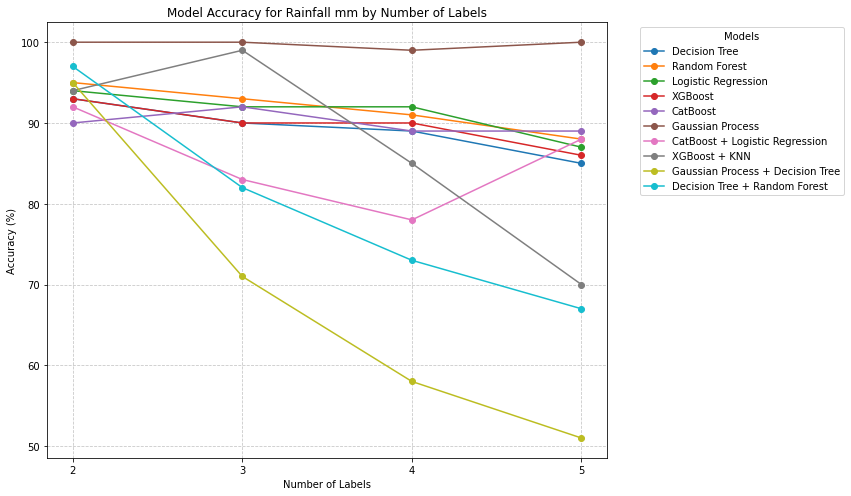

In [2]:
import matplotlib.pyplot as plt

# Data for Rainfall mm
labels = [2, 3, 4, 5]
models = {
    'Decision Tree': [93, 90, 89, 85],
    'Random Forest': [95, 93, 91, 88],
    'Logistic Regression': [94, 92, 92, 87],
    'XGBoost': [93, 90, 90, 86],
    'CatBoost': [90, 92, 89, 89],
    'Gaussian Process': [100, 100, 99, 100],
    'CatBoost + Logistic Regression': [92, 83, 78, 88],
    'XGBoost + KNN': [94, 99, 85, 70],
    'Gaussian Process + Decision Tree': [95, 71, 58, 51],
    'Decision Tree + Random Forest': [97, 82, 73, 67]
}

# Plot settings
plt.figure(figsize=(12, 7))
for model, accuracies in models.items():
    plt.plot(labels, accuracies, marker='o', label=model)

# Adding labels and title
plt.xlabel('Number of Labels')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy for Rainfall mm by Number of Labels')
plt.xticks(labels)
plt.yticks(range(50, 101, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Models')
plt.tight_layout()

# Show plot
plt.show()